In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from scipy.stats import chi2_contingency
from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
from scipy.stats import kstest

In [4]:
df_original = pd.read_csv("HR-Employee-Attrition Dataset.csv")

### Data describing

In [5]:
df_original.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


In [6]:
df_original.tail(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1460,29,No,Travel_Rarely,468,Research & Development,28,4,Medical,1,2054,...,2,80,0,5,3,1,5,4,0,4
1461,50,Yes,Travel_Rarely,410,Sales,28,3,Marketing,1,2055,...,2,80,1,20,3,3,3,2,2,0
1462,39,No,Travel_Rarely,722,Sales,24,1,Marketing,1,2056,...,1,80,1,21,2,2,20,9,9,6
1463,31,No,Non-Travel,325,Research & Development,5,3,Medical,1,2057,...,2,80,0,10,2,3,9,4,1,7
1464,26,No,Travel_Rarely,1167,Sales,5,3,Other,1,2060,...,4,80,0,5,2,3,4,2,0,0
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [7]:
df_original.shape

(1470, 35)

In [8]:
df=df_original.drop_duplicates()
df.shape

(1470, 35)

Describe the data set

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
#there are no missing values

In [10]:
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [ ]:
# EmployeeCount,EmployeeNumber,Over18,StandardHours  no use

In [11]:
#drop the four columns which are useless for analysis
df.drop(["EmployeeNumber", "EmployeeCount", "Over18", "StandardHours"], axis=1, inplace=True)

In [12]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

### EDA

#### Univariate Anlysis

In [14]:
df.describe(include='all')

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470,1470,1470.000000,1470,1470.000000,1470.000000,1470,1470.000000,1470,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,2,3,NaN,3,NaN,NaN,6,NaN,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,No,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,Male,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1233,1043,NaN,961,NaN,NaN,606,NaN,882,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36.923810,NaN,NaN,802.485714,NaN,9.192517,2.912925,NaN,2.721769,NaN,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,NaN,NaN,403.509100,NaN,8.106864,1.024165,NaN,1.093082,NaN,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,NaN,NaN,102.000000,NaN,1.000000,1.000000,NaN,1.000000,NaN,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,NaN,NaN,465.000000,NaN,2.000000,2.000000,NaN,2.000000,NaN,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,NaN,NaN,802.000000,NaN,7.000000,3.000000,NaN,3.000000,NaN,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,NaN,NaN,1157.000000,NaN,14.000000,4.000000,NaN,4.000000,NaN,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000


In [15]:
df.astype('object').describe().transpose()

,count,unique,top,freq
Age,1470,43,35,78
Attrition,1470,2,No,1233
BusinessTravel,1470,3,Travel_Rarely,1043
DailyRate,1470,886,691,6
Department,1470,3,Research & Development,961
DistanceFromHome,1470,29,2,211
Education,1470,5,3,572
EducationField,1470,6,Life Sciences,606
EnvironmentSatisfaction,1470,4,3,453
Gender,1470,2,Male,882


In [16]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [17]:
df['Education'].value_counts()

3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64

In [18]:
df['EnvironmentSatisfaction'].value_counts()

3    453
4    446
2    287
1    284
Name: EnvironmentSatisfaction, dtype: int64

In [19]:
df['HourlyRate'].value_counts() 

66    29
98    28
42    28
48    28
84    28
      ..
31    15
53    14
68    14
38    13
34    12
Name: HourlyRate, Length: 71, dtype: int64

In [20]:
df['HourlyRate'].describe()

count    1470.000000
mean       65.891156
std        20.329428
min        30.000000
25%        48.000000
50%        66.000000
75%        83.750000
max       100.000000
Name: HourlyRate, dtype: float64

In [21]:
df['JobInvolvement'].value_counts()   

3    868
2    375
4    144
1     83
Name: JobInvolvement, dtype: int64

In [22]:
df['JobLevel'].value_counts() 

1    543
2    534
3    218
4    106
5     69
Name: JobLevel, dtype: int64

In [23]:
df['JobSatisfaction'].value_counts() 

4    459
3    442
1    289
2    280
Name: JobSatisfaction, dtype: int64

In [24]:
df['NumCompaniesWorked'].value_counts()

1    521
0    197
3    159
2    146
4    139
7     74
6     70
5     63
9     52
8     49
Name: NumCompaniesWorked, dtype: int64

In [25]:
df['PercentSalaryHike'].value_counts() 

11    210
13    209
14    201
12    198
15    101
18     89
17     82
16     78
19     76
22     56
20     55
21     48
23     28
24     21
25     18
Name: PercentSalaryHike, dtype: int64

In [26]:
df['PerformanceRating'].value_counts() 

3    1244
4     226
Name: PerformanceRating, dtype: int64

In [27]:
df['RelationshipSatisfaction'].value_counts() 

3    459
4    432
2    303
1    276
Name: RelationshipSatisfaction, dtype: int64

In [28]:
df['StockOptionLevel'].value_counts() 

0    631
1    596
2    158
3     85
Name: StockOptionLevel, dtype: int64

In [29]:
df['TotalWorkingYears'].value_counts()  # may segment to groups

10    202
6     125
8     103
9      96
5      88
7      81
1      81
4      63
12     48
3      42
15     40
16     37
11     36
13     36
21     34
17     33
2      31
14     31
20     30
18     27
19     22
23     22
22     21
24     18
25     14
28     14
26     14
0      11
29     10
31      9
32      9
30      7
33      7
27      7
36      6
34      5
37      4
35      3
40      2
38      1
Name: TotalWorkingYears, dtype: int64

In [30]:
df['TotalWorkingYears'].describe()

count    1470.000000
mean       11.279592
std         7.780782
min         0.000000
25%         6.000000
50%        10.000000
75%        15.000000
max        40.000000
Name: TotalWorkingYears, dtype: float64

In [31]:
df['TrainingTimesLastYear'].value_counts()

2    547
3    491
4    123
5    119
1     71
6     65
0     54
Name: TrainingTimesLastYear, dtype: int64

In [32]:
df['WorkLifeBalance'].value_counts()

3    893
2    344
4    153
1     80
Name: WorkLifeBalance, dtype: int64

In [33]:
df['YearsAtCompany'].value_counts()  # may segment to groups

5     196
1     171
3     128
2     127
10    120
4     110
7      90
9      82
8      80
6      76
0      44
11     32
20     27
13     24
15     20
14     18
22     15
12     14
21     14
18     13
16     12
19     11
17      9
24      6
33      5
25      4
26      4
31      3
32      3
27      2
36      2
29      2
23      2
37      1
40      1
34      1
30      1
Name: YearsAtCompany, dtype: int64

In [34]:
df['YearsAtCompany'].describe()

count    1470.000000
mean        7.008163
std         6.126525
min         0.000000
25%         3.000000
50%         5.000000
75%         9.000000
max        40.000000
Name: YearsAtCompany, dtype: float64

In [35]:
df['YearsInCurrentRole'].value_counts()  # may segment to groups

2     372
0     244
7     222
3     135
4     104
8      89
9      67
1      57
6      37
5      36
10     29
11     22
13     14
14     11
12     10
15      8
16      7
17      4
18      2
Name: YearsInCurrentRole, dtype: int64

In [36]:
df['YearsInCurrentRole'].describe()

count    1470.000000
mean        4.229252
std         3.623137
min         0.000000
25%         2.000000
50%         3.000000
75%         7.000000
max        18.000000
Name: YearsInCurrentRole, dtype: float64

In [37]:
df['YearsSinceLastPromotion'].value_counts()  

0     581
1     357
2     159
7      76
4      61
3      52
5      45
6      32
11     24
8      18
9      17
15     13
13     10
12     10
14      9
10      6
Name: YearsSinceLastPromotion, dtype: int64

In [38]:
df['YearsSinceLastPromotion'].describe()

count    1470.000000
mean        2.187755
std         3.222430
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max        15.000000
Name: YearsSinceLastPromotion, dtype: float64

In [39]:
df['YearsWithCurrManager'].value_counts()

2     344
0     263
7     216
3     142
8     107
4      98
1      76
9      64
5      31
6      29
10     27
11     22
12     18
13     14
17      7
15      5
14      5
16      2
Name: YearsWithCurrManager, dtype: int64

In [40]:
df['YearsWithCurrManager'].describe()

count    1470.000000
mean        4.123129
std         3.568136
min         0.000000
25%         2.000000
50%         3.000000
75%         7.000000
max        17.000000
Name: YearsWithCurrManager, dtype: float64

In [41]:
#filter categorical variables
categorical_columns = [x for x in df.dtypes.index if df.dtypes[x]=='object']
#Exclude ID cols and source:
categorical_columns =[x for x in categorical_columns]
#print frequency of categories
for col in categorical_columns:
    print("\nFrequency of Categories for variable %s" %col)
    print(df[col].value_counts())


Frequency of Categories for variable Attrition
No     1233
Yes     237
Name: Attrition, dtype: int64

Frequency of Categories for variable BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

Frequency of Categories for variable Department
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

Frequency of Categories for variable EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

Frequency of Categories for variable Gender
Male      882
Female    588
Name: Gender, dtype: int64

Frequency of Categories for variable JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager            

In [ ]:
from pandas_profiling import ProfileReport

In [ ]:
ProfileReport(df)

#### Bivariate analysis

Target VS Categorical Variables

In [46]:
def bi_categorical_cat(df_var_pred, df_var_target,size):
    '''This function returns summarization, visual,and test of independency for bivariate analysis of categorical x categorical features. df[var_pred], df[var_target]'''
    
    contigency_table = pd.crosstab(df_var_pred,df_var_target)
   # print('This is contingency table for:\n\n',contigency_table,'\n')

    alpha = 0.05
    chi_2, p_val, dof, exp_val = chi2_contingency(contigency_table)
    if size == 'L':
        contigency_table.plot(kind='bar',figsize=(14,8))
    else:
        contigency_table.plot(kind='bar',figsize=(14,3))
    plt.title('Bivariate Analysis, chisq(p-value):'+str(p_val))
    plt.ylim(0,450)
    #plt.legend(loc=5)
    plt.legend(ncol=2,fontsize=10)
    plt.show()
    
    print("Chi-sqare's results:\n")
    if p_val > alpha:
        print('DOF: ',dof,'\np-value= ',p_val,"\n\n Fail to reject Null Hypothesis. There's no relationsip between variables at 5% significance level.")
    else:
        print('DOF: ',dof,'\np-value= ',p_val,"\n\n Reject Null Hypothesis. There's a relationship between variables at 5% significance level.")   

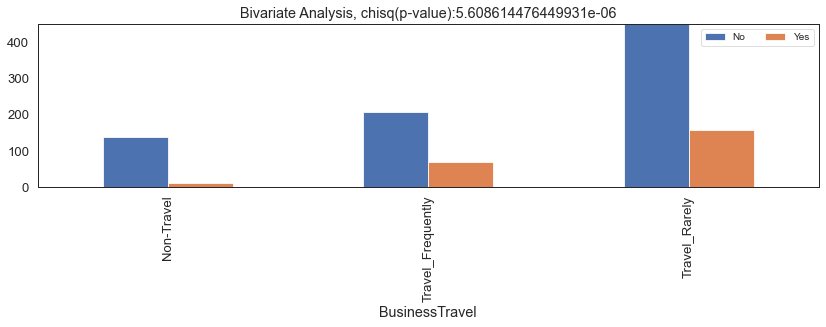

Chi-sqare's results:

DOF:  2 
p-value=  5.608614476449931e-06 

 Reject Null Hypothesis. There's a relationship between variables at 5% significance level.


In [47]:
bi_categorical_cat(df.BusinessTravel, df.Attrition,1)

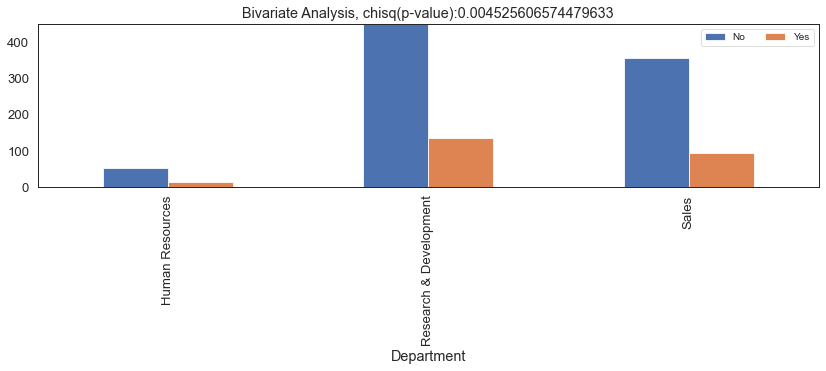

Chi-sqare's results:

DOF:  2 
p-value=  0.004525606574479633 

 Reject Null Hypothesis. There's a relationship between variables at 5% significance level.


In [48]:
bi_categorical_cat(df.Department, df.Attrition,1)

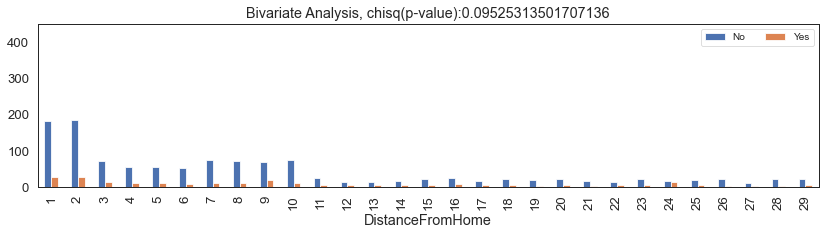

Chi-sqare's results:

DOF:  28 
p-value=  0.09525313501707136 

 Fail to reject Null Hypothesis. There's no relationsip between variables at 5% significance level.


In [49]:
bi_categorical_cat(df.DistanceFromHome, df.Attrition,1)

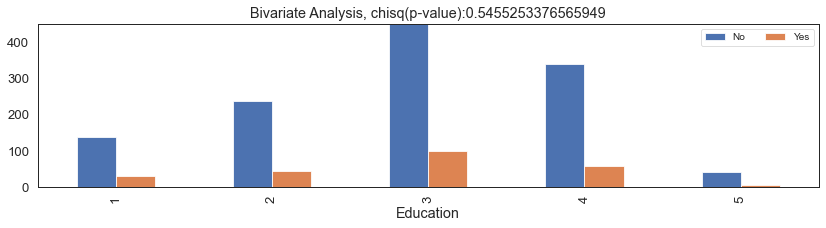

Chi-sqare's results:

DOF:  4 
p-value=  0.5455253376565949 

 Fail to reject Null Hypothesis. There's no relationsip between variables at 5% significance level.


In [50]:
bi_categorical_cat(df.Education, df.Attrition,1)

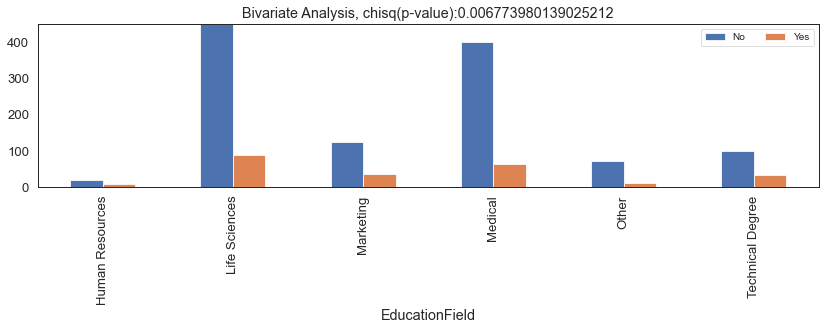

Chi-sqare's results:

DOF:  5 
p-value=  0.006773980139025212 

 Reject Null Hypothesis. There's a relationship between variables at 5% significance level.


In [51]:
bi_categorical_cat(df.EducationField, df.Attrition,1)

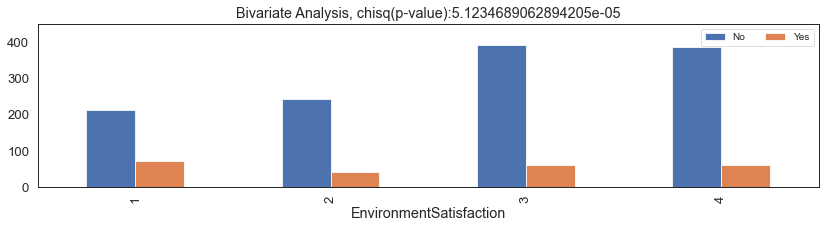

Chi-sqare's results:

DOF:  3 
p-value=  5.1234689062894205e-05 

 Reject Null Hypothesis. There's a relationship between variables at 5% significance level.


In [52]:
bi_categorical_cat(df.EnvironmentSatisfaction, df.Attrition,1)

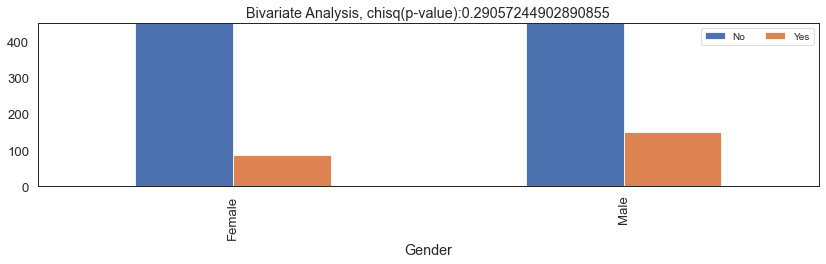

Chi-sqare's results:

DOF:  1 
p-value=  0.29057244902890855 

 Fail to reject Null Hypothesis. There's no relationsip between variables at 5% significance level.


In [53]:
bi_categorical_cat(df.Gender, df.Attrition,1)

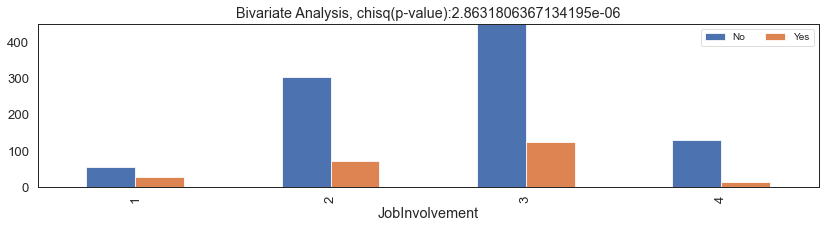

Chi-sqare's results:

DOF:  3 
p-value=  2.8631806367134195e-06 

 Reject Null Hypothesis. There's a relationship between variables at 5% significance level.


In [54]:
bi_categorical_cat(df.JobInvolvement, df.Attrition,1)

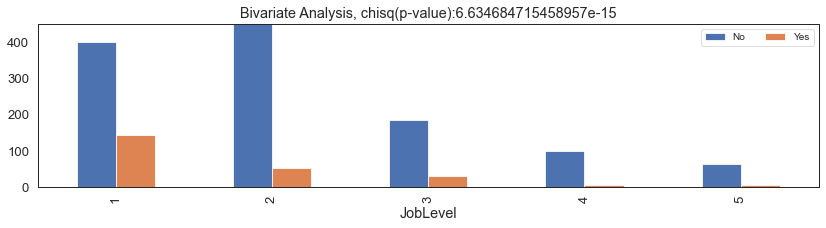

Chi-sqare's results:

DOF:  4 
p-value=  6.634684715458957e-15 

 Reject Null Hypothesis. There's a relationship between variables at 5% significance level.


In [55]:
bi_categorical_cat(df.JobLevel, df.Attrition,1)

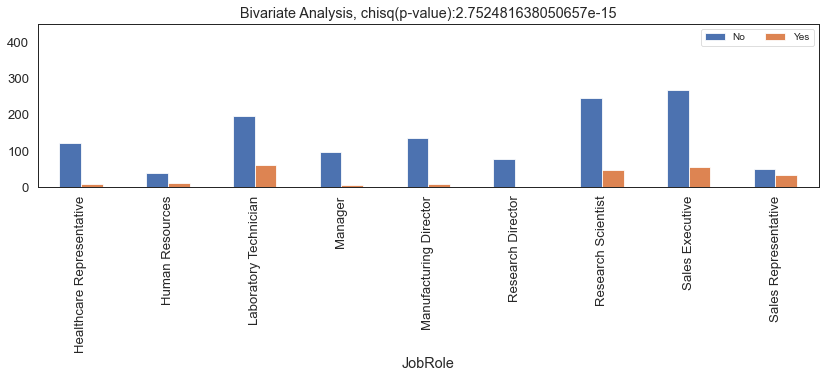

Chi-sqare's results:

DOF:  8 
p-value=  2.752481638050657e-15 

 Reject Null Hypothesis. There's a relationship between variables at 5% significance level.


In [56]:
bi_categorical_cat(df.JobRole, df.Attrition,1)

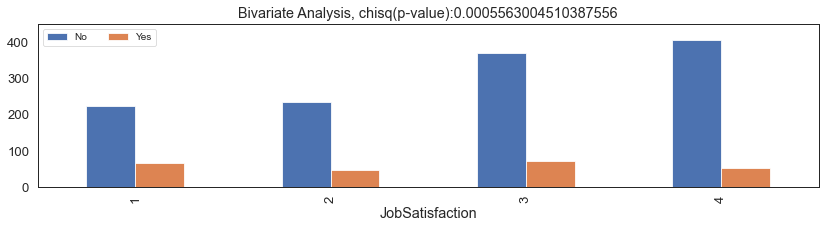

Chi-sqare's results:

DOF:  3 
p-value=  0.0005563004510387556 

 Reject Null Hypothesis. There's a relationship between variables at 5% significance level.


In [57]:
bi_categorical_cat(df.JobSatisfaction, df.Attrition,1)

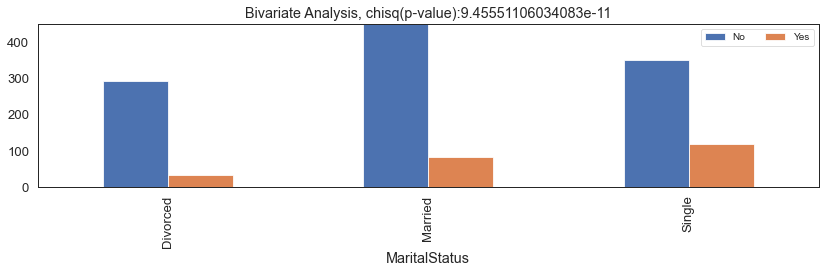

Chi-sqare's results:

DOF:  2 
p-value=  9.45551106034083e-11 

 Reject Null Hypothesis. There's a relationship between variables at 5% significance level.


In [58]:
bi_categorical_cat(df.MaritalStatus, df.Attrition,1)

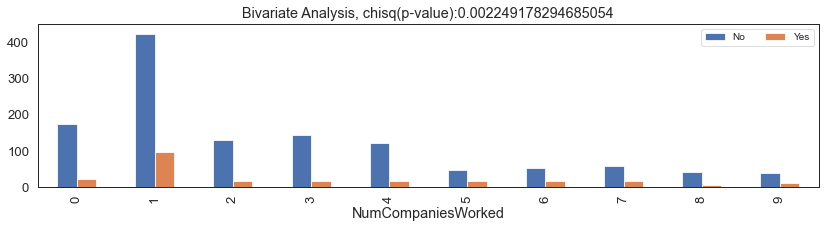

Chi-sqare's results:

DOF:  9 
p-value=  0.002249178294685054 

 Reject Null Hypothesis. There's a relationship between variables at 5% significance level.


In [59]:
bi_categorical_cat(df.NumCompaniesWorked, df.Attrition,1)

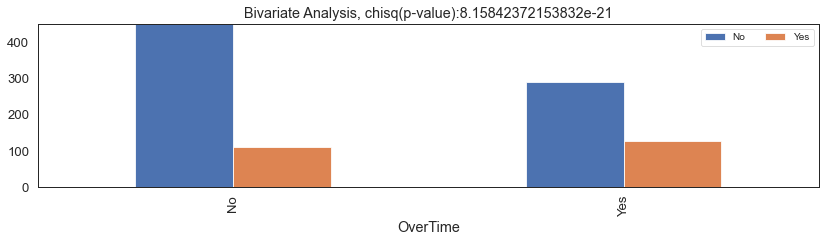

Chi-sqare's results:

DOF:  1 
p-value=  8.15842372153832e-21 

 Reject Null Hypothesis. There's a relationship between variables at 5% significance level.


In [60]:
bi_categorical_cat(df.OverTime, df.Attrition,1)

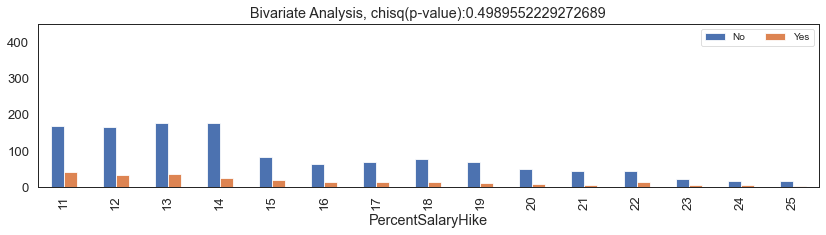

Chi-sqare's results:

DOF:  14 
p-value=  0.4989552229272689 

 Fail to reject Null Hypothesis. There's no relationsip between variables at 5% significance level.


In [61]:
bi_categorical_cat(df.PercentSalaryHike, df.Attrition,1)

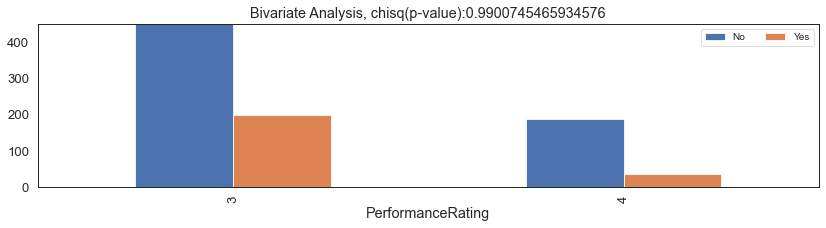

Chi-sqare's results:

DOF:  1 
p-value=  0.9900745465934576 

 Fail to reject Null Hypothesis. There's no relationsip between variables at 5% significance level.


In [62]:
bi_categorical_cat(df.PerformanceRating, df.Attrition,1)

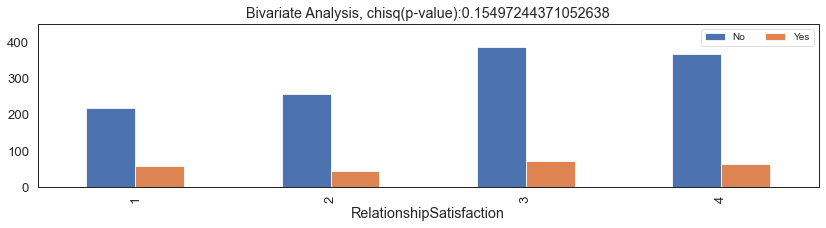

Chi-sqare's results:

DOF:  3 
p-value=  0.15497244371052638 

 Fail to reject Null Hypothesis. There's no relationsip between variables at 5% significance level.


In [63]:
bi_categorical_cat(df.RelationshipSatisfaction, df.Attrition,1)

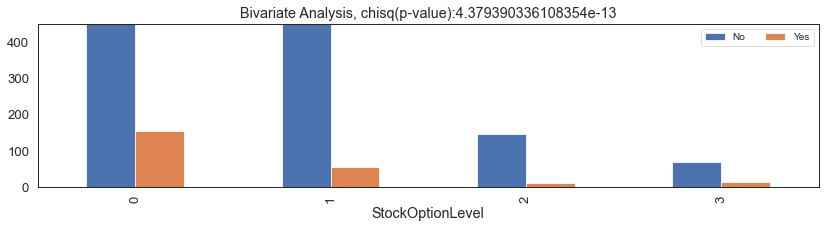

Chi-sqare's results:

DOF:  3 
p-value=  4.379390336108354e-13 

 Reject Null Hypothesis. There's a relationship between variables at 5% significance level.


In [64]:
bi_categorical_cat(df.StockOptionLevel, df.Attrition,1)

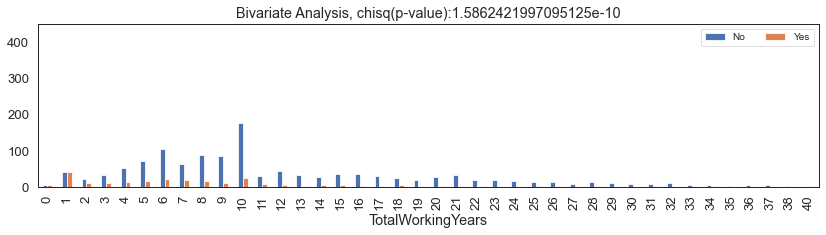

Chi-sqare's results:

DOF:  39 
p-value=  1.5862421997095125e-10 

 Reject Null Hypothesis. There's a relationship between variables at 5% significance level.


In [65]:
bi_categorical_cat(df.TotalWorkingYears, df.Attrition,1)

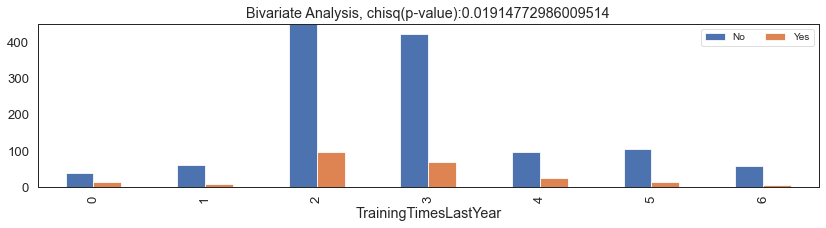

Chi-sqare's results:

DOF:  6 
p-value=  0.01914772986009514 

 Reject Null Hypothesis. There's a relationship between variables at 5% significance level.


In [66]:
bi_categorical_cat(df.TrainingTimesLastYear, df.Attrition,1)

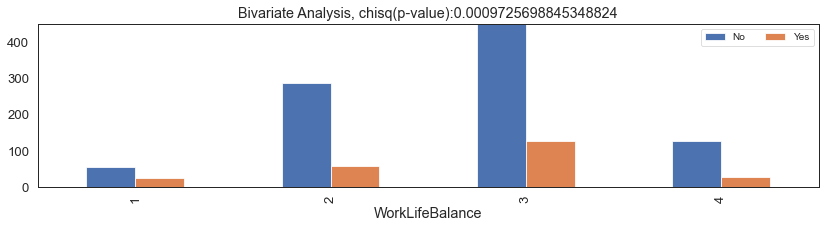

Chi-sqare's results:

DOF:  3 
p-value=  0.0009725698845348824 

 Reject Null Hypothesis. There's a relationship between variables at 5% significance level.


In [67]:
bi_categorical_cat(df.WorkLifeBalance, df.Attrition,1)

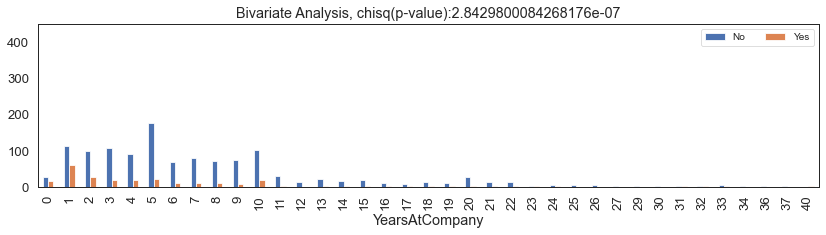

Chi-sqare's results:

DOF:  36 
p-value=  2.8429800084268176e-07 

 Reject Null Hypothesis. There's a relationship between variables at 5% significance level.


In [68]:
bi_categorical_cat(df.YearsAtCompany, df.Attrition,1)

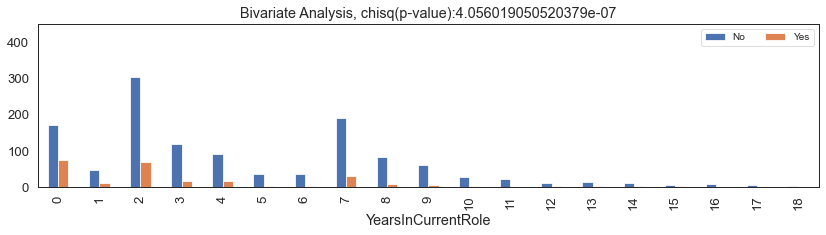

Chi-sqare's results:

DOF:  18 
p-value=  4.056019050520379e-07 

 Reject Null Hypothesis. There's a relationship between variables at 5% significance level.


In [69]:
bi_categorical_cat(df.YearsInCurrentRole, df.Attrition,1)

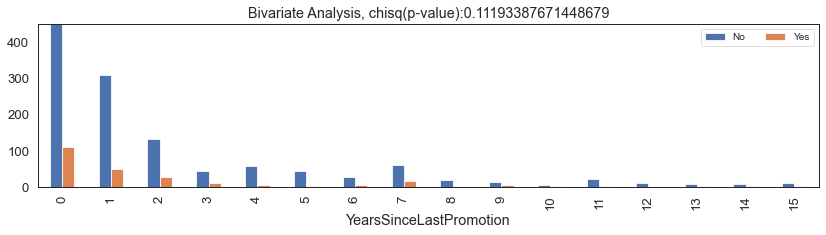

Chi-sqare's results:

DOF:  15 
p-value=  0.11193387671448679 

 Fail to reject Null Hypothesis. There's no relationsip between variables at 5% significance level.


In [70]:
bi_categorical_cat(df.YearsSinceLastPromotion, df.Attrition,1)

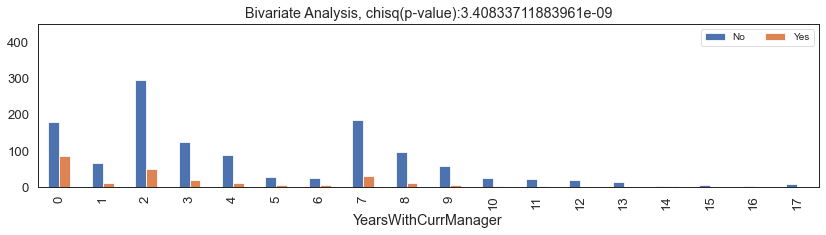

Chi-sqare's results:

DOF:  17 
p-value=  3.40833711883961e-09 

 Reject Null Hypothesis. There's a relationship between variables at 5% significance level.


In [71]:
bi_categorical_cat(df.YearsWithCurrManager, df.Attrition,1)

Target VS Continuos Variable

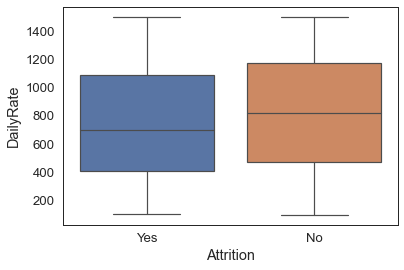

In [72]:
ax = sns.boxplot(x='Attrition', y='DailyRate', data=df)

In [73]:
df.groupby(['Attrition']).agg({'DailyRate':np.mean})

,DailyRate
Attrition,
No,812.504461
Yes,750.362869


In [74]:
df.groupby(['Attrition']).agg({'DailyRate':'describe'})

DailyRate                                                       \
              count        mean         std    min    25%    50%     75%   
Attrition                                                                  
No           1233.0  812.504461  403.208379  102.0  477.0  817.0  1176.0   
Yes           237.0  750.362869  401.899519  103.0  408.0  699.0  1092.0   

                   
              max  
Attrition          
No         1499.0  
Yes        1496.0

In [75]:
Y=df[(df['Attrition']=='Yes')]
N=df[(df['Attrition']=='No')]
Y.shape,N.shape

((237, 31), (1233, 31))

Text(0.5, 1.0, 'Independent Sample T-Test')

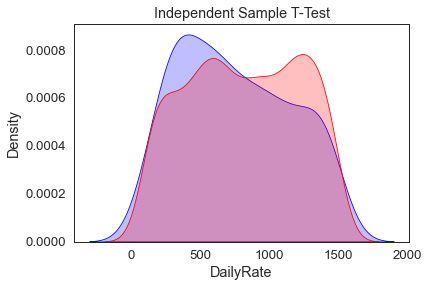

In [76]:
sns.kdeplot(Y['DailyRate'], shade=True,color='blue')
sns.kdeplot(N['DailyRate'], shade=True,color='red')
plt.title("Independent Sample T-Test")

In [ ]:
# two groug is independent
# Rely on the Central Limit Theorem if the sample size is large enough(n>30 )

In [78]:
a=Y['DailyRate']
b=N['DailyRate']

In [79]:
from scipy import stats
stats.levene(a, b)# p>0.05, the variance of each group is equal

LeveneResult(statistic=0.13703794064142177, pvalue=0.7112970406238526)

In [80]:
tStat, pValue = stats.ttest_ind(a, b, equal_var = True) #run independent sample T-Testfor equal variance
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat))#print the P-Value and the T-Statistic

P-Value:0.02985816066026497 T-Statistic:-2.1740836777017747


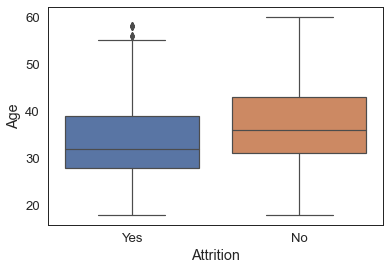

In [81]:
ax = sns.boxplot(x='Attrition', y='Age', data=df)

In [82]:
df.groupby(['Attrition']).agg({'Age':np.mean})

,Age
Attrition,
No,37.561233
Yes,33.607595


In [83]:
df.groupby(['Attrition']).agg({'Age':'describe'})

Age                                                  
            count       mean      std   min   25%   50%   75%   max
Attrition                                                          
No         1233.0  37.561233  8.88836  18.0  31.0  36.0  43.0  60.0
Yes         237.0  33.607595  9.68935  18.0  28.0  32.0  39.0  58.0

In [84]:
Y=df[(df['Attrition']=='Yes')]
N=df[(df['Attrition']=='No')]
Y.shape,N.shape

((237, 31), (1233, 31))

Text(0.5, 1.0, 'Independent Sample T-Test')

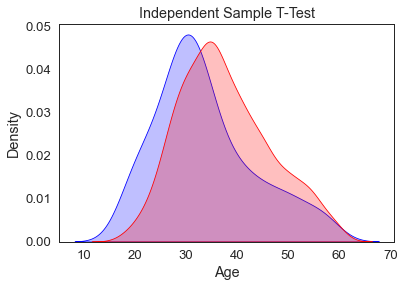

In [85]:
sns.kdeplot(Y['Age'], shade=True,color='blue')
sns.kdeplot(N['Age'], shade=True,color='red')
plt.title("Independent Sample T-Test")

In [86]:
a=Y['Age']
b=N['Age']

In [87]:
from scipy import stats
stats.levene(a, b)# p>0.05, the variance of each group is equal

LeveneResult(statistic=0.48784929772776303, pvalue=0.4849988830829256)

In [88]:
tStat, pValue = stats.ttest_ind(a, b, equal_var = True) #run independent sample T-Testfor equal variance
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat))

P-Value:8.356308021103649e-10 T-Statistic:-6.1786638353072165


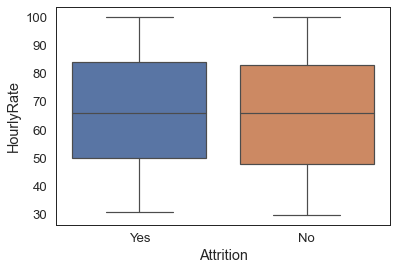

In [90]:
ax = sns.boxplot(x='Attrition', y='HourlyRate', data=df)

In [91]:
df.groupby(['Attrition']).agg({'HourlyRate':np.mean})

,HourlyRate
Attrition,
No,65.952149
Yes,65.573840


In [92]:
df.groupby(['Attrition']).agg({'HourlyRate':'describe'})

HourlyRate                                                     
               count       mean        std   min   25%   50%   75%    max
Attrition                                                                
No            1233.0  65.952149  20.380754  30.0  48.0  66.0  83.0  100.0
Yes            237.0  65.573840  20.099958  31.0  50.0  66.0  84.0  100.0

In [93]:
Y=df[(df['Attrition']=='Yes')]
N=df[(df['Attrition']=='No')]
Y.shape,N.shape

((237, 31), (1233, 31))

Text(0.5, 1.0, 'Independent Sample T-Test')

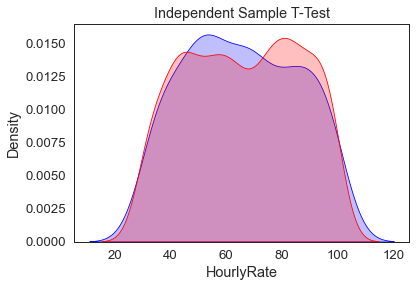

In [94]:
sns.kdeplot(Y['HourlyRate'], shade=True,color='blue')
sns.kdeplot(N['HourlyRate'], shade=True,color='red')
plt.title("Independent Sample T-Test")

In [95]:
a=Y['HourlyRate']
b=N['HourlyRate']

In [96]:
from scipy import stats
stats.levene(a, b)# p>0.05, the variance of each group is equal

LeveneResult(statistic=0.4510511131556991, pvalue=0.501941889460197)

In [97]:
tStat, pValue = stats.ttest_ind(a, b, equal_var = True) #run independent sample T-Testfor equal variance
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat))

P-Value:0.7931347689944243 T-Statistic:-0.26228987349264493


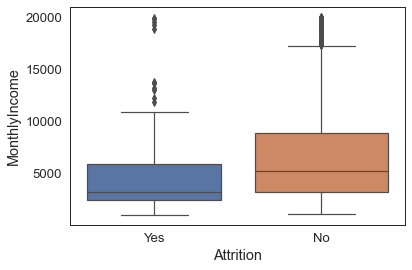

In [98]:
ax = sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)

In [99]:
df.MonthlyIncome.describe(include="all")

count     1470.000000
mean      6502.931293
std       4707.956783
min       1009.000000
25%       2911.000000
50%       4919.000000
75%       8379.000000
max      19999.000000
Name: MonthlyIncome, dtype: float64

In [100]:
    Q1=df['MonthlyIncome'].quantile(0.25)
    Q3=df['MonthlyIncome'].quantile(0.75)
    IQR=Q3-Q1
    UIF=Q3+3*(IQR)#UIF is upper inner fence
    LIF=Q1-3*(IQR)#LIF is lower inner fence
    print(UIF,LIF)

24783.0 -13493.0


In [101]:
df.groupby(['Attrition']).agg({'MonthlyIncome':np.mean})

,MonthlyIncome
Attrition,
No,6832.739659
Yes,4787.092827


In [102]:
df.groupby(['Attrition']).agg({'MonthlyIncome':'describe'})

MonthlyIncome                                                    \
                  count         mean          std     min     25%     50%   
Attrition                                                                   
No               1233.0  6832.739659  4818.208001  1051.0  3211.0  5204.0   
Yes               237.0  4787.092827  3640.210367  1009.0  2373.0  3202.0   

                            
              75%      max  
Attrition                   
No         8834.0  19999.0  
Yes        5916.0  19859.0

In [103]:
Y=df[(df['Attrition']=='Yes')]
N=df[(df['Attrition']=='No')]
Y.shape,N.shape

((237, 31), (1233, 31))

Text(0.5, 1.0, 'Independent Sample T-Test')

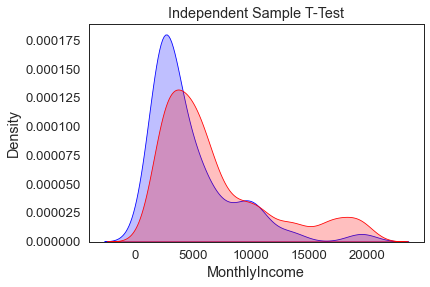

In [104]:
sns.kdeplot(Y['MonthlyIncome'], shade=True,color='blue')
sns.kdeplot(N['MonthlyIncome'], shade=True,color='red')
plt.title("Independent Sample T-Test")

In [105]:
a=Y['MonthlyIncome']
b=N['MonthlyIncome']

In [201]:
from scipy import stats
stats.levene(a, b)# p>0.05, the variance of each group is not equal

LeveneResult(statistic=14.899586974568717, pvalue=0.00011830973427184532)

In [106]:
tStat, pValue = stats.ttest_ind(a, b, equal_var = False) #run independent sample T-Testfor equal variance
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat))

P-Value:4.433588628286071e-13 T-Statistic:-7.482621586644742


In [ ]:
Therefore, we reject the null hypothesis.
we can conclude that there is a statistiaclly association between MonthlyIncome and Attrition at 5% significant level
But because there are major outliers, the accuracy of t test has been influenced by the major outliers.

In [107]:
# segment MonthlyIncome
def binning (col, cut_points, labels=None):
    minval=col.min()
    maxval=col.max()
    break_points=[minval]+cut_points+[maxval]
    if not labels:
        labels=range(len(cut_points)+1)
    colBin=pd.cut(col,bins=break_points,labels=labels,include_lowest=True)
    return colBin

In [108]:
df['MonthlyIncome'].describe(include="all")

count     1470.000000
mean      6502.931293
std       4707.956783
min       1009.000000
25%       2911.000000
50%       4919.000000
75%       8379.000000
max      19999.000000
Name: MonthlyIncome, dtype: float64

In [109]:
df['MonthlyIncome_group']=0
df['MonthlyIncome_group']=binning(df['MonthlyIncome'],[3000,5000,8000],labels=['less than 3000','3000-5000','5000-8000','more than 8000'])
df['MonthlyIncome_group'].value_counts()

less than 3000    395
more than 8000    381
3000-5000         354
5000-8000         340
Name: MonthlyIncome_group, dtype: int64

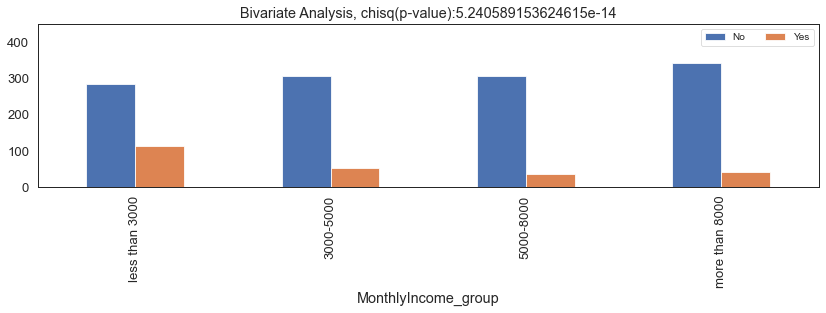

Chi-sqare's results:

DOF:  3 
p-value=  5.240589153624615e-14 

 Reject Null Hypothesis. There's a relationship between variables at 5% significance level.


In [110]:
bi_categorical_cat(df.MonthlyIncome_group, df.Attrition,1)

In [ ]:
Attrition vs MonthlyRate

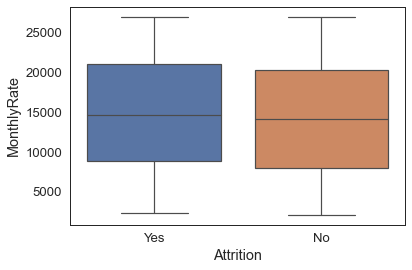

In [111]:
ax = sns.boxplot(x='Attrition', y='MonthlyRate', data=df)

In [112]:
df.groupby(['Attrition']).agg({'MonthlyRate':np.mean})

,MonthlyRate
Attrition,
No,14265.779400
Yes,14559.308017


In [113]:
df.groupby(['Attrition']).agg({'MonthlyRate':'describe'})

MonthlyRate                                                      \
                count          mean          std     min     25%      50%   
Attrition                                                                   
No             1233.0  14265.779400  7102.260749  2094.0  7973.0  14120.0   
Yes             237.0  14559.308017  7208.153264  2326.0  8870.0  14618.0   

                             
               75%      max  
Attrition                    
No         20364.0  26997.0  
Yes        21081.0  26999.0

In [114]:
Y=df[(df['Attrition']=='Yes')]
N=df[(df['Attrition']=='No')]
Y.shape,N.shape

((237, 32), (1233, 32))

Text(0.5, 1.0, 'Independent Sample T-Test')

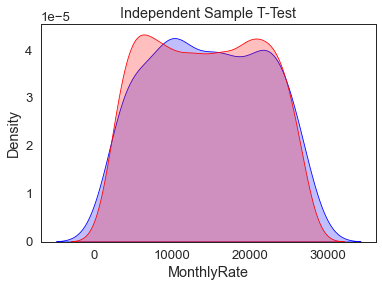

In [115]:
sns.kdeplot(Y['MonthlyRate'], shade=True,color='blue')
sns.kdeplot(N['MonthlyRate'], shade=True,color='red')
plt.title("Independent Sample T-Test")

In [116]:
a=Y['MonthlyRate']
b=N['MonthlyRate']

In [117]:
from scipy import stats
stats.levene(a, b)# p>0.05, the variance of each group is equal

LeveneResult(statistic=0.03150748458605897, pvalue=0.8591374218401133)

In [118]:
tStat, pValue = stats.ttest_ind(a, b, equal_var = True) #run independent sample T-Testfor equal variance
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat))

P-Value:0.5611235982243015 T-Statistic:0.5813058211545318


In [119]:
df_model=df.copy()

In [120]:
df_model.drop(["MonthlyIncome"], axis=1, inplace=True)

In [121]:
df_model.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'MonthlyIncome_group'],
      dtype='object')

In [122]:
df_model['Attrition']=df_model['Attrition'].apply(lambda x : 0 if (x=='No') else 1)

### Enocding

In [123]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Age                       1470 non-null   int64   
 1   Attrition                 1470 non-null   int64   
 2   BusinessTravel            1470 non-null   object  
 3   DailyRate                 1470 non-null   int64   
 4   Department                1470 non-null   object  
 5   DistanceFromHome          1470 non-null   int64   
 6   Education                 1470 non-null   int64   
 7   EducationField            1470 non-null   object  
 8   EnvironmentSatisfaction   1470 non-null   int64   
 9   Gender                    1470 non-null   object  
 10  HourlyRate                1470 non-null   int64   
 11  JobInvolvement            1470 non-null   int64   
 12  JobLevel                  1470 non-null   int64   
 13  JobRole                   1470 non-null   object

In [124]:
df_dummy = pd.get_dummies(df_model,columns=['BusinessTravel','Department',
                                            'EducationField','Gender','JobRole','MaritalStatus',
                                            'OverTime','MonthlyIncome_group' ],drop_first=True)
df_dummy.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,MonthlyIncome_group_3000-5000,MonthlyIncome_group_5000-8000,MonthlyIncome_group_more than 8000
0,41,1,1102,1,2,2,94,3,2,4,...,0,0,1,0,0,1,1,0,1,0
1,49,0,279,8,1,3,61,2,2,2,...,0,1,0,0,1,0,0,0,1,0
2,37,1,1373,2,2,4,92,2,1,3,...,0,0,0,0,0,1,1,0,0,0
3,33,0,1392,3,4,4,56,3,1,3,...,0,1,0,0,1,0,1,0,0,0
4,27,0,591,2,1,1,40,3,1,2,...,0,0,0,0,1,0,0,1,0,0


### X y

In [125]:
X = pd.DataFrame(df_dummy.drop(['Attrition'],axis=1))
X.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyRate,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,MonthlyIncome_group_3000-5000,MonthlyIncome_group_5000-8000,MonthlyIncome_group_more than 8000
0,41,1102,1,2,2,94,3,2,4,19479,...,0,0,1,0,0,1,1,0,1,0
1,49,279,8,1,3,61,2,2,2,24907,...,0,1,0,0,1,0,0,0,1,0
2,37,1373,2,2,4,92,2,1,3,2396,...,0,0,0,0,0,1,1,0,0,0
3,33,1392,3,4,4,56,3,1,3,23159,...,0,1,0,0,1,0,1,0,0,0
4,27,591,2,1,1,40,3,1,2,16632,...,0,0,0,0,1,0,0,1,0,0


In [126]:
X

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyRate,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,MonthlyIncome_group_3000-5000,MonthlyIncome_group_5000-8000,MonthlyIncome_group_more than 8000
0,41,1102,1,2,2,94,3,2,4,19479,...,0,0,1,0,0,1,1,0,1,0
1,49,279,8,1,3,61,2,2,2,24907,...,0,1,0,0,1,0,0,0,1,0
2,37,1373,2,2,4,92,2,1,3,2396,...,0,0,0,0,0,1,1,0,0,0
3,33,1392,3,4,4,56,3,1,3,23159,...,0,1,0,0,1,0,1,0,0,0
4,27,591,2,1,1,40,3,1,2,16632,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,3,41,4,2,4,12290,...,0,0,0,0,1,0,0,0,0,0
1466,39,613,6,1,4,42,2,3,1,21457,...,0,0,0,0,1,0,0,0,0,1
1467,27,155,4,3,2,87,4,2,2,5174,...,0,0,0,0,1,0,1,0,1,0
1468,49,1023,2,3,4,63,2,2,2,13243,...,0,0,1,0,1,0,0,0,1,0


In [127]:
y=df_dummy['Attrition']
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

In [128]:
len(y)

1470

### Scaling

In [129]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_scaled = pd.DataFrame(sc.fit_transform(X),columns = X.columns)

In [130]:
X_scaled

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyRate,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,MonthlyIncome_group_3000-5000,MonthlyIncome_group_5000-8000,MonthlyIncome_group_more than 8000
0,0.446350,0.742527,-1.010909,-0.891688,-0.660531,1.383138,0.379672,-0.057788,1.153254,0.726020,...,-0.239904,-0.497873,1.873287,-0.244625,-0.918921,1.458650,1.591746,-0.563209,1.823055,-0.591492
1,1.322365,-1.297775,-0.147150,-1.868426,0.254625,-0.240677,-1.026167,-0.057788,-0.660853,1.488876,...,-0.239904,2.008543,-0.533821,-0.244625,1.088232,-0.685565,-0.628241,-0.563209,1.823055,-0.591492
2,0.008343,1.414363,-0.887515,-0.891688,1.169781,1.284725,-1.026167,-0.961486,0.246200,-1.674841,...,-0.239904,-0.497873,-0.533821,-0.244625,-0.918921,1.458650,1.591746,-0.563209,-0.548530,-0.591492
3,-0.429664,1.461466,-0.764121,1.061787,1.169781,-0.486709,0.379672,-0.961486,0.246200,1.243211,...,-0.239904,2.008543,-0.533821,-0.244625,1.088232,-0.685565,1.591746,-0.563209,-0.548530,-0.591492
4,-1.086676,-0.524295,-0.887515,-1.868426,-1.575686,-1.274014,0.379672,-0.961486,-0.660853,0.325900,...,-0.239904,-0.497873,-0.533821,-0.244625,1.088232,-0.685565,-0.628241,1.775540,-0.548530,-0.591492
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,-0.101159,0.202082,1.703764,-0.891688,0.254625,-1.224807,1.785511,-0.057788,1.153254,-0.284329,...,-0.239904,-0.497873,-0.533821,-0.244625,1.088232,-0.685565,-0.628241,-0.563209,-0.548530,-0.591492
1466,0.227347,-0.469754,-0.393938,-1.868426,1.169781,-1.175601,-1.026167,0.845911,-1.567907,1.004010,...,-0.239904,-0.497873,-0.533821,-0.244625,1.088232,-0.685565,-0.628241,-0.563209,-0.548530,1.690641
1467,-1.086676,-1.605183,-0.640727,0.085049,-0.660531,1.038693,1.785511,-0.057788,-0.660853,-1.284418,...,-0.239904,-0.497873,-0.533821,-0.244625,1.088232,-0.685565,1.591746,-0.563209,1.823055,-0.591492
1468,1.322365,0.546677,-0.887515,0.085049,1.169781,-0.142264,-1.026167,-0.057788,-0.660853,-0.150393,...,-0.239904,-0.497873,1.873287,-0.244625,1.088232,-0.685565,-0.628241,-0.563209,1.823055,-0.591492


In [131]:
y.value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

In [132]:
X=X_scaled.copy()
X

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyRate,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,MonthlyIncome_group_3000-5000,MonthlyIncome_group_5000-8000,MonthlyIncome_group_more than 8000
0,0.446350,0.742527,-1.010909,-0.891688,-0.660531,1.383138,0.379672,-0.057788,1.153254,0.726020,...,-0.239904,-0.497873,1.873287,-0.244625,-0.918921,1.458650,1.591746,-0.563209,1.823055,-0.591492
1,1.322365,-1.297775,-0.147150,-1.868426,0.254625,-0.240677,-1.026167,-0.057788,-0.660853,1.488876,...,-0.239904,2.008543,-0.533821,-0.244625,1.088232,-0.685565,-0.628241,-0.563209,1.823055,-0.591492
2,0.008343,1.414363,-0.887515,-0.891688,1.169781,1.284725,-1.026167,-0.961486,0.246200,-1.674841,...,-0.239904,-0.497873,-0.533821,-0.244625,-0.918921,1.458650,1.591746,-0.563209,-0.548530,-0.591492
3,-0.429664,1.461466,-0.764121,1.061787,1.169781,-0.486709,0.379672,-0.961486,0.246200,1.243211,...,-0.239904,2.008543,-0.533821,-0.244625,1.088232,-0.685565,1.591746,-0.563209,-0.548530,-0.591492
4,-1.086676,-0.524295,-0.887515,-1.868426,-1.575686,-1.274014,0.379672,-0.961486,-0.660853,0.325900,...,-0.239904,-0.497873,-0.533821,-0.244625,1.088232,-0.685565,-0.628241,1.775540,-0.548530,-0.591492
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,-0.101159,0.202082,1.703764,-0.891688,0.254625,-1.224807,1.785511,-0.057788,1.153254,-0.284329,...,-0.239904,-0.497873,-0.533821,-0.244625,1.088232,-0.685565,-0.628241,-0.563209,-0.548530,-0.591492
1466,0.227347,-0.469754,-0.393938,-1.868426,1.169781,-1.175601,-1.026167,0.845911,-1.567907,1.004010,...,-0.239904,-0.497873,-0.533821,-0.244625,1.088232,-0.685565,-0.628241,-0.563209,-0.548530,1.690641
1467,-1.086676,-1.605183,-0.640727,0.085049,-0.660531,1.038693,1.785511,-0.057788,-0.660853,-1.284418,...,-0.239904,-0.497873,-0.533821,-0.244625,1.088232,-0.685565,1.591746,-0.563209,1.823055,-0.591492
1468,1.322365,0.546677,-0.887515,0.085049,1.169781,-0.142264,-1.026167,-0.057788,-0.660853,-0.150393,...,-0.239904,-0.497873,1.873287,-0.244625,1.088232,-0.685565,-0.628241,-0.563209,1.823055,-0.591492


In [133]:
X['Attrition']=0
X

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyRate,...,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,MonthlyIncome_group_3000-5000,MonthlyIncome_group_5000-8000,MonthlyIncome_group_more than 8000,Attrition
0,0.446350,0.742527,-1.010909,-0.891688,-0.660531,1.383138,0.379672,-0.057788,1.153254,0.726020,...,-0.497873,1.873287,-0.244625,-0.918921,1.458650,1.591746,-0.563209,1.823055,-0.591492,0
1,1.322365,-1.297775,-0.147150,-1.868426,0.254625,-0.240677,-1.026167,-0.057788,-0.660853,1.488876,...,2.008543,-0.533821,-0.244625,1.088232,-0.685565,-0.628241,-0.563209,1.823055,-0.591492,0
2,0.008343,1.414363,-0.887515,-0.891688,1.169781,1.284725,-1.026167,-0.961486,0.246200,-1.674841,...,-0.497873,-0.533821,-0.244625,-0.918921,1.458650,1.591746,-0.563209,-0.548530,-0.591492,0
3,-0.429664,1.461466,-0.764121,1.061787,1.169781,-0.486709,0.379672,-0.961486,0.246200,1.243211,...,2.008543,-0.533821,-0.244625,1.088232,-0.685565,1.591746,-0.563209,-0.548530,-0.591492,0
4,-1.086676,-0.524295,-0.887515,-1.868426,-1.575686,-1.274014,0.379672,-0.961486,-0.660853,0.325900,...,-0.497873,-0.533821,-0.244625,1.088232,-0.685565,-0.628241,1.775540,-0.548530,-0.591492,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,-0.101159,0.202082,1.703764,-0.891688,0.254625,-1.224807,1.785511,-0.057788,1.153254,-0.284329,...,-0.497873,-0.533821,-0.244625,1.088232,-0.685565,-0.628241,-0.563209,-0.548530,-0.591492,0
1466,0.227347,-0.469754,-0.393938,-1.868426,1.169781,-1.175601,-1.026167,0.845911,-1.567907,1.004010,...,-0.497873,-0.533821,-0.244625,1.088232,-0.685565,-0.628241,-0.563209,-0.548530,1.690641,0
1467,-1.086676,-1.605183,-0.640727,0.085049,-0.660531,1.038693,1.785511,-0.057788,-0.660853,-1.284418,...,-0.497873,-0.533821,-0.244625,1.088232,-0.685565,1.591746,-0.563209,1.823055,-0.591492,0
1468,1.322365,0.546677,-0.887515,0.085049,1.169781,-0.142264,-1.026167,-0.057788,-0.660853,-0.150393,...,-0.497873,1.873287,-0.244625,1.088232,-0.685565,-0.628241,-0.563209,1.823055,-0.591492,0


In [134]:
X['Attrition']=y
X['Attrition'].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

In [135]:
from sklearn.utils import shuffle
X2,y = shuffle(X,y,random_state=0)

In [136]:
from sklearn.model_selection import train_test_split

In [137]:
X_train,X_test,y_train,y_test=train_test_split(X2,y,random_state=0,test_size=0.25)

In [138]:
type(X_train)

pandas.core.frame.DataFrame

In [139]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold,cross_val_score
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score, roc_curve

In [140]:
def modelfit(model, data, predictors, outcome,test_data):
  #Fit the model:
  model.fit(data[predictors],data[outcome])
  
  #Make predictions on training set:
  predictions = model.predict(test_data[predictors])

  print ("\nModel Report")
  print(model)
  
  #Print accuracy
  accuracy = metrics.accuracy_score(predictions,test_data[outcome])
  #print ("Accuracy : %s" % "{0:.3%}".format(accuracy))

  #print cross_val_score
  cv_score=cross_val_score(model,data[predictors],data[outcome],cv=20).mean()  
  print("Cross_validation_score : %s" % "{0:.3%}".format(cv_score))

  #Fit the model again so that it can be refered outside the function:
  model.fit(data[predictors],data[outcome]) 
  prediction=model.predict(test_data[predictors])
    
  #confusion_matrix
  print(classification_report(test_data[outcome],prediction))
  print(confusion_matrix(test_data[outcome],prediction))
  
    
  #roc curve
  y_pred_prob = model.predict_proba(test_data[predictors])[:,1]

  fpr, tpr, thresholds = roc_curve(test_data[outcome], y_pred_prob)

  plt.plot(fpr,tpr)
  plt.xlabel('fpr')
  plt.ylabel('tpr')
  plt.title("Roc with auc score: %s" % "{0:.3%}".format(accuracy))
  plt.show()

### LogisticRegression

In [141]:
X_train.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gender_Male',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Research Scientist',
       'JobR


Model Report
LogisticRegression(class_weight={0: 1, 1: 5})
Cross_validation_score : 77.575%
              precision    recall  f1-score   support

           0       0.94      0.75      0.84       305
           1       0.40      0.78      0.52        63

    accuracy                           0.76       368
   macro avg       0.67      0.77      0.68       368
weighted avg       0.85      0.76      0.78       368

[[230  75]
 [ 14  49]]


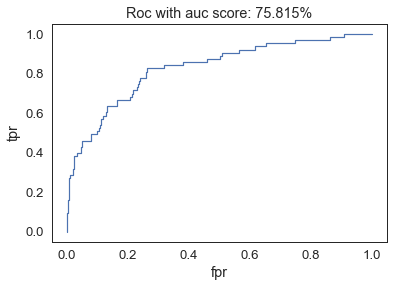

In [142]:
outcome_var="Attrition"
model = LogisticRegression(class_weight={0:1, 1:5})
predictor_var = [ 'Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gender_Male',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Research Scientist',
       'JobRole_Sales Executive', 'JobRole_Sales Representative',
       'MaritalStatus_Married', 'MaritalStatus_Single', 'OverTime_Yes',
       'MonthlyIncome_group_3000-5000', 'MonthlyIncome_group_5000-8000',
       'MonthlyIncome_group_more than 8000']
modelfit(model, X_train,predictor_var,outcome_var,X_test)

<AxesSubplot:title={'center':'LogisticRegression Coefficients Importance'}>

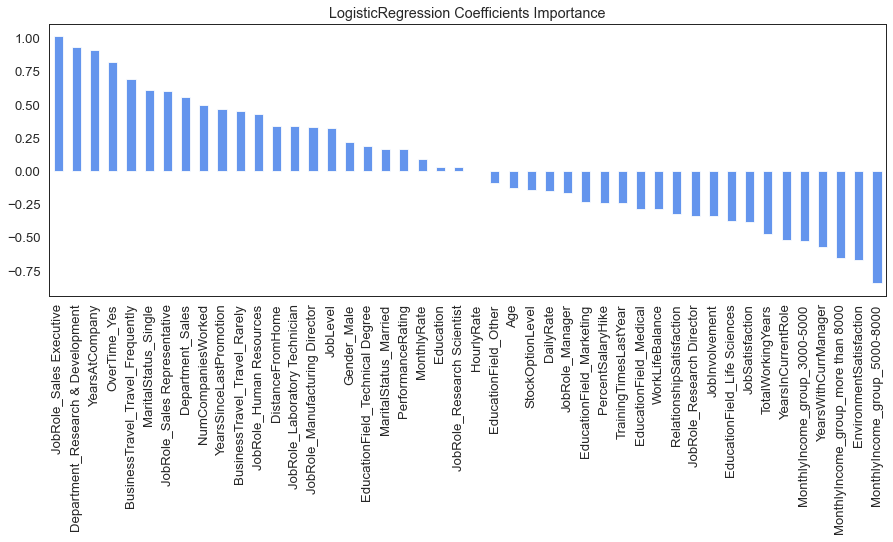

In [143]:
coef=[]
for i in range(0,len(model.coef_)):
    for m in model.coef_[i]:
        coef.append(m)
featimp = pd.Series(coef, index=predictor_var).sort_values(ascending=False)
featimp.plot(kind='bar', title='LogisticRegression Coefficients Importance',color='cornflowerblue',figsize=(15, 5))